# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> type your name here </font>

# I. Introduction

The objective of the assignment is to implement and compare classification algorithms: Pocket training classifier, QDA, LDA and logistic regression to predict if the salary in the adult dataset is greater than or lesser than \$50000.
The adult dataset used below can be obtained at https://archive.ics.uci.edu/ml/datasets/Adult.

# II. Data

The adult dataset contains 30162 rows and 15 columns. The column "salary" will be the dependent target variables whereas the other 14 columns will be used as independent variables to predict "salary".
The dataset is preprocessed to check for and remove any null values, nan values or special characters. The categorical columns are label encoded and the target "salary" is encoded as $-1$ for "salary"$\leq \$50000$ and $+1$ for "salaray" $> \$50000$.
The dataset is further divided into data for training and data for testing.


In [642]:
import pandas as pd
data = pd.read_csv(r'''/home/sagar/ITCS-6156/ITCS-6156-Assignment/adult-dataset/adult.data''', header=None)
column_names = pd.read_csv(r'''/home/sagar/ITCS-6156/ITCS-6156-Assignment/adult-dataset/adult.names''', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [643]:
import numpy as np
c_name = column_names.to_numpy()
c_name = np.append(c_name, 'salary')
data.columns = c_name

In [644]:
# some rows contain ' ?', function removes all rows with ' ?'
def drop_rows(df, label):
    for i in df.columns:
        index = df.loc[df[i] == label].index
        df.drop(index, inplace=True)
    return df
        

In [645]:
data = drop_rows(data, ' ?')

In [646]:
def encode_columns(df):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        df[i] = le.fit_transform(df[i])
    return df


In [647]:
data_categorical = data.select_dtypes(include=['object','category'])
data_notcategorical = data.select_dtypes(exclude=['object','category'])

In [648]:
data_categorical = encode_columns(data_categorical)

/home/sagar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [649]:
data = pd.merge(left = data_categorical, right = data_notcategorical, left_on=data_categorical.index, right_on=data_notcategorical.index)
data.drop(columns=['key_0'], inplace=True)

In [324]:
#data = encode_columns(data)

In [650]:
data.loc[data.salary==0, 'salary'] = -1
data.loc[data.salary==1, 'salary'] = 1

In [651]:
import numpy as np
def split_train_test(data, test_ratio, seed):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [652]:
data_train, data_test = split_train_test(data, 0.3, seed=100)

In [653]:
X_train = data_train.drop(columns=['salary']).to_numpy()
T_train = data_train['salary'].to_numpy()

In [654]:
X_test = data_test.drop(columns=['salary']).to_numpy()
T_test = data_test['salary'].to_numpy()

In [602]:
# X_train = X_train[:10000]
# T_train = T_train[:10000]

# III. Method

## Summary of classification models

### Pocket algorithm

The pocket algorithm uses perceptron algorithm ie., a single linear model (perceptron) applies a step function to its output while iterating over the training samples and updating weights to result in correct classification. One distinction of Pocket algorithm from perceptron learning is that it stores the best solution obtained so far in the training.

## Discriminant analysis

Discriminant analysis is different from the linear models in a way that it does not directly model the reponse given the predictors but alternatively models the distributions of the predictors for each response class and flips it using Bayes rule to predict the responses. Discriminant analysis can be broadly classified into two types:

- Quadratic Discriminant Analysis (QDA): QDA classifier assumes that the observations from each class are drawn from a Gaussian distribution and plugs the estimates for the parameters using Bayes rule to perform prediction. In the case of binary classification $k \in \{-1, +1\}$, samples with positive labels will have a higher posterior probability and vice-versa.
    For a sample with positive label $ P(T=+1|x) > P(T=-1|x) $. The discriminant function $\delta_{k}(x) $ can be computed using 
    $$
    \delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
    $$


- Linear Discriminant Analysis (LDA): Unlike QDA, LDA assumes the observations are drawn from a multivariate gaussian distribution. Hence, can draw a class specific mean veactor and a covariance matrix that is common to all class labels. The discriminant function for LDA is given by 
    $$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$


## Logistic Regression

Logistic regression is used to directly predict $P(T=k | x) $, where $k$ is a class label instead of predicting the class label $k$. Hence, needs to compute multiple probbaility outputs for each class label and uses a maximum likelihood function to make predictions. A gradient is used to update the weights during training $w \leftarrow w - \alpha \nabla_w E(w).$ Since $P(T=k|x)$ is a probability function that satisfies the laws of probability, softmax function is used to generalize the logistic sigmoid function using $\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j).$ The weight update is given by $w_j \leftarrow w_j + \alpha X^\top \Big(  t_{*,j} - g_j(X)\Big).$




### A. Super Classs Definition

Super class BaseModel is inherited into the class Classifier which houses methods to normalize and add bias to the training data.

In [655]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

Class PocketAlgorithm inherits class Classifier. After initializing the weights, pocket weights, maximum iterations and the learning rate for the training process. The training method starts with initializing the weight and updating it depending on the prediction made and the actual reponse and improves classification by updating these weights. The best weight found up until any point in the training is stored in the pocket (wp). Once the training is complete, the last pocket weight is used to make prediction in the use method.

In [663]:
from copy import deepcopy as copy
# from matplotlib import pyplot as plt
        

class PocketAlgorithm(Classifier):
    
    def __init__(self, iters, alpha):
        Classifier.__init__(self)
        self.w = None
        self.wp = None
        self.iters = iters
        self.alpha = alpha
    
    @staticmethod
    def compare(X, T, w, wp):
            y = np.sign(X@w)
            yp = np.sign(X@wp)
            
            return 1 if np.sum(y==T) >= np.sum(yp==T) else -1
    
    def train(self, X, T):
        
        self.w = np.zeros(X.shape[1])
        self.wp = copy(self.w)
        N = X.shape[0]
        
        
        plt.plot(T)
        for i in range(self.iters):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
                
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha*T[k]*X[k]
                    converged = False
                    
                    if self.compare(X, T, self.w, self.wp) > 0:
                        self.wp[:] = self.w[:]
                        
            if converged:
                print("converged at ", i)
                break
                
        print("end of training: ", i)   
        plt.plot(X@self.wp)
    
    def use(self, X):
        #X1 = self.add_ones(X)
        return np.sign(X@self.wp)
    

### C. QDA

Class QDA inherits from class Classifier. The method QDAfunc returns the quadratic discriminant function of the matrix X. The training method first normalizes the data then splits the training data according to their class labels and computes the discriminant function for each class label. Note that the covariance matrix is computed for all class labels. The computed quadratic discriminant function is used to make predictions using Bayes rule.

In [657]:
class QDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1 = None
        self.Sigma1 = None
        self.prior1 = None
        self.mu2 = None
        self.Sigma2 = None
        self.prior2 = None
        
        
    @staticmethod
    def QDAfunc(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5*np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diffv@sigma_inv*diffv, axis=1) + np.log(prior)
    
    
    def train(self, X, T):
        Xs = self.normalize(X)
        t1 = np.argwhere(T==-1)
        X1 = Xs[t1[:,0]]
        t2 = np.argwhere(T==1)
        X2 = Xs[t2[:,0]]
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        
        self.prior1 = N1/(N1+N2)
        self.prior2 = N2/(N1+N2)
        
    def use(self, X):
        Xtest = self.normalize(X)
        d1 = self.QDAfunc(Xtest, self.mu1, self.Sigma1, self.prior1)
        d2 = self.QDAfunc(Xtest, self.mu2, self.Sigma2, self.prior2)
        return np.where(d1>d2, -1,1), d1, d2
        
        

### D. LDA

Class LDA inherits from class Classifier. The method LDAfunc returns the linear discriminant function of the matrix X. The training method splits the training data according to their class labels without normalizing and computes the discriminant function for each class label. Note that only one covariance matrix is computed for the class labels. The linear discriminant function trained is used to make predictions using Bayes rule.

In [718]:
class LDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1 = None
        self.Sigma = None
        self.prior1 = None
        self.mu2 = None
        self.prior2 = None
        
    
    @staticmethod
    def LDAfunc(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum((X @ sigma_inv) * mu \
                - 0.5 * (mu @ sigma_inv) * mu, axis=1) \
                + np.log(prior)
    
    def train(self, X, T):
        t1 = np.argwhere(T==-1.0)
        X1 = X[t1[:,0]]
#         print('X1 shape: ', X1.shape)
        t2 = np.argwhere(T==1.0)
        X2 = X[t2[:,0]]
#         print('X2 shape: ', X2.shape)
        
        N1 = X1.shape[0]
#         print('N1:', N1)
        N2 = X2.shape[0]
#         print('N2: ', N2)
        
        self.mu1 = np.mean(X1, 0)
#         print('mu1: ', self.mu1.shape)
        self.mu2 = np.mean(X2, 0)
#         print('mu2: ', self.mu2.shape)
        
        self.Sigma = np.cov(X.T)
        
        self.prior1 = N1/(N1+N2)
        self.prior2 = N2/(N1+N2)
        
    def use(self, X):
        Xtest = self.normalize(X)
        d1 = self.LDAfunc(X_test, self.mu1, self.Sigma, self.prior1)
        d2 = self.LDAfunc(X_test, self.mu2, self.Sigma, self.prior2)
        return np.where(d1>d2, -1,1), d1, d2
        

### E. Logistic Regression

The class LogisticRegression inherits from class Classifier. The methods softmax transforms the data using softmax transformation. During training, the normalized training data is used to compute training weights. One distinction in this method is the computation of probability matrix for all class labels throughout the length of the training data. The use method applies softmax transformation using test data and trained weights to produce predictions. 

In [659]:
class LogisticRegression(Classifier):
    
    def __init__(self, alpha, iters):
        self.w = None
        self.alpha = alpha
        self.iters = iters
    
    @staticmethod
    def softmax(z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f= np.exp(z)
        return f/(np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def g(self, X, w):
        return self.softmax(X @ w)
    
    def train(self, X, T):
        X = self.normalize(X)
        
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        
        for i in range(self.iters):
            ys = self.g(X, self.w)
            self.w += self.alpha*X.T@(T-ys)
    
    def use(self, X):
        Xtest = self.normalize(X)
        Xtest = self.add_ones(Xtest)
        return self.g(Xtest, self.w)
        

# IV. Experiments

In [660]:
# Confustion matrix 

def confusion_matrix2(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

# Pocket algorithm

end of training:  49


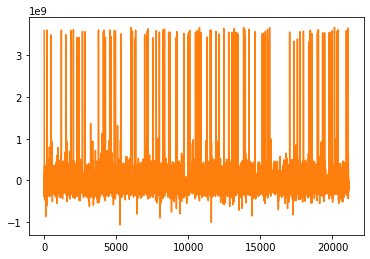

In [664]:
# pocket algorithm
pa = PocketAlgorithm(iters = 50, alpha=0.01)
pa.train(X_train, T_train)
pred_pa = pa.use(X_test)

In [610]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
cm_pa = confusion_matrix(T_test, pred_pa)
TP_pa=cm_pa[1][1]
TN_pa=cm_pa[0][0]
FN_pa=cm_pa[1][0]
FP_pa=cm_pa[0][1]

In [611]:
print('Specificity of Pocket algorithm: ', TN_pa/(TN_pa+FP_pa))
print('Precision of Pocket algorithm', TP_pa / (TP_pa + FP_pa))
print('Recall of Pocket algorithm', TP_pa / (TP_pa+FN_pa))
print('Accuracy of Pocket algorithm: ', accuracy_score(T_test, pred_pa))
print('F1 score of Pocket algorithm', f1_score(T_test, pred_pa))



Specificity of Pocket algorithm:  0.9811879721522737
Precision of Pocket algorithm 0.7806563039723662
Recall of Pocket algorithm 0.19677840661732696
Accuracy of Pocket algorithm:  0.782051282051282
F1 score of Pocket algorithm 0.3143254520166899


In [612]:
# confusion matrix Pocket algorithm
confusion_matrix2(pred_pa, T_test)

,-1,1
-1,6624,1845
1,127,452


# QDA

In [665]:
# QDA
qda = QDA()
qda.train(X_train, T_train)
pred_qda, d1_qda, d2_qda = qda.use(X_test)

In [666]:
cm_qda = confusion_matrix(T_test, pred_qda)
TP_qda=cm_qda[1][1]
TN_qda=cm_qda[0][0]
FN_qda=cm_qda[1][0]
FP_qda=cm_qda[0][1]

In [667]:
print('Specificity of QDA algorithm: ', TN_qda/(TN_qda+FP_qda))
print('Precision of QDA algorithm', TP_qda / (TP_qda + FP_qda))
print('Recall of QDA algorithm', TP_qda / (TP_qda+FN_qda))
print('Accuracy of QDA algorithm: ', accuracy_score(T_test, pred_qda))
print('F1 score of QDA algorithm', f1_score(T_test, pred_qda))

Specificity of QDA algorithm:  0.956302769960006
Precision of QDA algorithm 0.7133138969873664
Recall of QDA algorithm 0.3195472355245973
Accuracy of QDA algorithm:  0.7946507515473032
F1 score of QDA algorithm 0.44137101623571856


In [668]:
# confusion matrix QDA algorithm
confusion_matrix2(pred_qda, T_test)

,-1,1
-1,6456,1563
1,295,734


Text(0.5, 0.92, 'QDA Discriminant Functions')

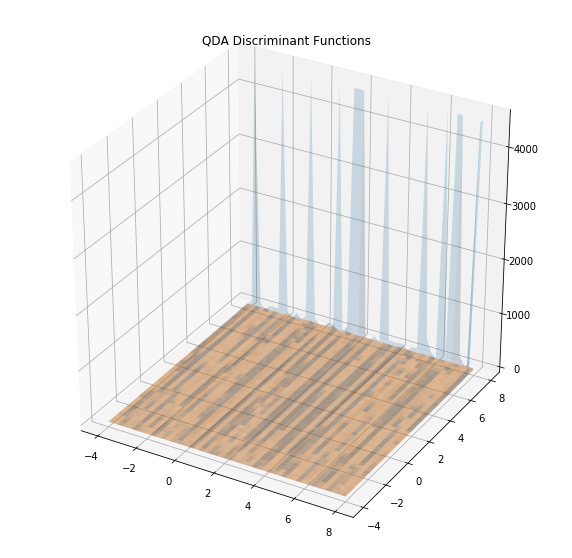

In [735]:

from mpl_toolkits.mplot3d import Axes3D
p_q,d1_q,d2_q = qda.use(X_test[:2500])    


xs, ys = np.meshgrid(np.linspace(-4,8, 50), np.linspace(-4,8, 50))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_q.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_q.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")




Text(0.5, 1.0, 'Decision Boundary')

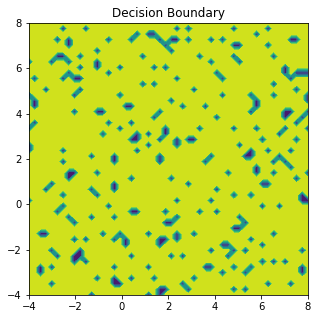

In [716]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_q-d2_q)) > 0).reshape(xs.shape))
plt.plot()
plt.title("QDA Decision Boundary")

# LDA

In [730]:
# LDA
lda = LDA()
lda.train(X_train, T_train)
pred_lda, d1_lda, d2_lda = lda.use(X_test)

In [731]:
cm_lda = confusion_matrix(T_test, pred_lda)
TP_lda=cm_lda[1][1]
TN_lda=cm_lda[0][0]
FN_lda=cm_lda[1][0]
FP_lda=cm_lda[0][1]

In [732]:
print('Specificity of LDA algorithm: ', TN_lda/(TN_lda+FP_lda))
print('Precision of LDA algorithm', TP_lda / (TP_lda + FP_lda))
print('Recall of LDA algorithm', TP_lda / (TP_lda+FN_lda))
print('Accuracy of LDA algorithm: ', accuracy_score(T_test, pred_lda))
print('F1 score of LDA algorithm', f1_score(T_test, pred_lda))

Specificity of LDA algorithm:  0.969930380684343
Precision of LDA algorithm 0.7677345537757437
Recall of LDA algorithm 0.29212015672616454
Accuracy of LDA algorithm:  0.7978558797524314
F1 score of LDA algorithm 0.42321034374014505


In [733]:
# confusion matrix LDA algorithm
confusion_matrix2(pred_lda, T_test)

,-1,1
-1,6548,1626
1,203,671


ValueError: cannot reshape array of size 9048 into shape (50,50)

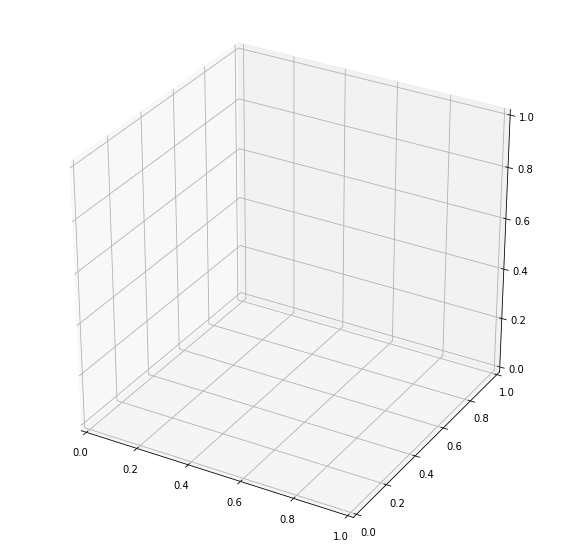

In [737]:

from mpl_toolkits.mplot3d import Axes3D
p_l,d1_l,d2_l = lda.use(X_test[:2500])    


xs, ys = np.meshgrid(np.linspace(-4,8, 50), np.linspace(-4,8, 50))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_l.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_l.reshape(xs.shape),0), alpha=0.4)
plt.title("LDA Discriminant Functions")

In [739]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_l-d2_l)) > 0).reshape(xs.shape))
plt.plot()
plt.title("LDA Decision Boundary")

ValueError: cannot reshape array of size 9048 into shape (50,50)

<Figure size 360x360 with 0 Axes>

# Logistic Regression

In [618]:
# Logistic regression
lr = LogisticRegression(alpha = 0.001, iters=10)
lr.train(X_train, T_train)
pred_lr = lr.use(X_test)
pred_lr

array([[9.99179834e-01, 8.20165991e-04],
       [9.94386748e-01, 5.61325162e-03],
       [9.99856743e-01, 1.43257385e-04],
       ...,
       [9.74819442e-01, 2.51805582e-02],
       [9.97362118e-01, 2.63788203e-03],
       [9.94032266e-01, 5.96773439e-03]])

In [619]:
lr_lab = np.argmax(pred_lr, 1)

In [620]:
# convert lr_lab to {-1, 1}
lr_lab[lr_lab == 0] = -1

Accuracy:  54.55349248452697 %


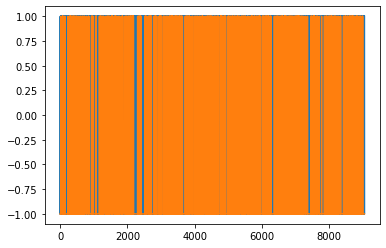

In [624]:
import matplotlib.pyplot as plt
plt.plot(T_test)
plt.plot(lr_lab)

print("Accuracy: ", 100 - np.mean(np.abs(T_test - lr_lab)) * 100, "%")

In [625]:
cm_lr = confusion_matrix(T_test, lr_lab)
TP_lr=cm_lr[1][1]
TN_lr=cm_lr[0][0]
FN_lr=cm_lr[1][0]
FP_lr=cm_lr[0][1]

In [626]:
print('Specificity of Logistc regression algorithm: ', TN_lr/(TN_lr+FP_lr))
print('Precision of Logistc regression algorithm', TP_lr / (TP_lr + FP_lr))
print('Recall of Logistc regression algorithm', TP_lr / (TP_lr+FN_lr))
print('Accuracy of Logistc regression algorithm: ', accuracy_score(T_test, lr_lab))
print('F1 score of Logistc regression algorithm', f1_score(T_test, lr_lab))

Specificity of Logistc regression algorithm:  0.9847430010368834
Precision of Logistc regression algorithm 0.7695749440715883
Recall of Logistc regression algorithm 0.1497605572485851
Accuracy of Logistc regression algorithm:  0.7727674624226348
F1 score of Logistc regression algorithm 0.25072886297376096


# Conclusions

The algorithms sorted based on their accuracy:
1. LDA: 79.79%
2. QDA: 79.47%
3. Pocket alorithm: 78.21
4. Logistic regression: 77.28%

The LDA slightly outperforms the other three algorithms in terms of accuracy.

The algorithms sorted based on their sensitivity(True Positive Rate); sensitivity indicates the algorithms ability to correctly classify positive {+1} class labels.

1. QDA: 0.3195472355245973
2. LDA: 0.29212015672616454
3. Pocket algorithm: 0.19677840661732696
4. Logistic regression: 0.1497605572485851

The alorithms sorted based on their specificity; specificity indicates the algorithms ability to correctly classify negative {-1} class labels.
1. Logistic regression: 0.9847430010368834
2. Pocket algorithm: 0.9811879721522737
3. LDA: 0.969930380684343
4. QDA: 0.956302769960006

From the above results it can be concluded that LDA and QDA have very comparable performances followed by the Pocket training alorithm and logistic regression.

# References


1. I. Goodfellow, Y. Bengio, and A. Courville,Deep learning.
2. A. M. C. S. Guido,Introduction to Machine Learning with Python.   O’Reilly Media, Inc,2016.
3. F. Chollet,Deep learning with Python

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

In [740]:
df1, df2, df3, df4, df5 = np.array_split(data, 5)

In [747]:
xTest1 = df1.drop(columns=['salary']).to_numpy()
tTest1 = df1['salary'].to_numpy()
xTest2 = df2.drop(columns=['salary']).to_numpy()
tTest2 = df2['salary'].to_numpy()
xTest3 = df3.drop(columns=['salary']).to_numpy()
tTest3 = df3['salary'].to_numpy()
xTest4 = df4.drop(columns=['salary']).to_numpy()
tTest4 = df4['salary'].to_numpy()
xTest5 = df5.drop(columns=['salary']).to_numpy()
tTest5 = df5['salary'].to_numpy()

In [749]:
train1 = pd.concat([df2, df3, df4, df5])
train2 = pd.concat([df1, df5, df3, df4])
train3 = pd.concat([df1, df2, df5, df4])
train4 = pd.concat([df1, df2, df3, df5])
train5 = pd.concat([df1, df2, df3, df4])

In [750]:
x_train1 = train1.drop(columns=['salary']).to_numpy()
t_train1 = train1['salary'].to_numpy()
x_train2 = train2.drop(columns=['salary']).to_numpy()
t_train2 = train2['salary'].to_numpy()
x_train3 = train3.drop(columns=['salary']).to_numpy()
t_train3 = train3['salary'].to_numpy()
x_train4 = train4.drop(columns=['salary']).to_numpy()
t_train4 = train4['salary'].to_numpy()
x_train5 = train5.drop(columns=['salary']).to_numpy()
t_train5 = train5['salary'].to_numpy()

In [ ]:
# pocket algorithm
pa1 = PocketAlgorithm(iters = 50, alpha=0.01)
pa1.train(x_train1, t_train1)
pred_pa1 = pa1.use(xTest1)

pa2 = PocketAlgorithm(iters = 50, alpha=0.01)
pa2.train(x_train2, t_train2)
pred_pa2 = pa2.use(xTest2)

pa3 = PocketAlgorithm(iters = 50, alpha=0.01)
pa3.train(x_train3, t_train3)
pred_pa3 = pa3.use(xTest3)

pa4 = PocketAlgorithm(iters = 50, alpha=0.01)
pa4.train(x_train4, t_train4)
pred_pa4 = pa4.use(xTest4)

pa5 = PocketAlgorithm(iters = 50, alpha=0.01)
pa5.train(x_train5, t_train5)
pred_pa5 = pa5.use(xTest5)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
print('Accuracy of 1: ', accuracy_score(tTest1, pred_pa1))
print('Accuracy of 2: ', accuracy_score(tTest2, pred_pa2))
print('Accuracy of 3: ', accuracy_score(tTest3, pred_pa3))
print('Accuracy of 4: ', accuracy_score(tTest4, pred_pa4))
print('Accuracy of 5: ', accuracy_score(tTest5, pred_pa5))


In [ ]:
# QDA

qda1 = QDA()
qda1.train(x_train1, t_train1)
pred_qda1, d1_qda1, d2_qda1 = qda1.use(xTest1)

qda2 = QDA()
qda2.train(x_train2, t_train2)
pred_qda2, d1_qda2, d2_qda2 = qda2.use(xTest2)

qda3 = QDA()
qda3.train(x_train3, t_train3)
pred_qda3, d1_qda3, d2_qda3 = qda3.use(xTest3)

qda4 = QDA()
qda4.train(x_train4, t_train4)
pred_qda4, d1_qda4, d2_qda4 = qda4.use(xTest4)

qda5 = QDA()
qda5.train(x_train5, t_train5)
pred_qda5, d1_qda5, d2_qda5 = qda5.use(xTest5)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
print('Accuracy of 1: ', accuracy_score(tTest1, pred_qda1))
print('Accuracy of 2: ', accuracy_score(tTest2, pred_qda2))
print('Accuracy of 3: ', accuracy_score(tTest3, pred_qda3))
print('Accuracy of 4: ', accuracy_score(tTest4, pred_qda4))
print('Accuracy of 5: ', accuracy_score(tTest5, pred_qda5))

In [ ]:
# LDA
lda1 = LDA()
lda1.train(x_train1, t_train1)
pred_lda1, d1_lda1, d2_lda1 = lda1.use(xTest1)

lda2 = LDA()
lda2.train(x_train2, t_train2)
pred_lda2, d1_lda2, d2_lda2 = lda2.use(xTest2)

lda3 = LDA()
lda3.train(x_train3, t_train3)
pred_lda3, d1_lda3, d2_lda3 = lda3.use(xTest3)

lda4 = LDA()
lda4.train(x_train4, t_train4)
pred_lda4, d1_lda4, d2_lda4 = lda4.use(xTest4)

lda5 = LDA()
lda5.train(x_train5, t_train5)
pred_lda5, d1_lda5, d2_lda5 = lda5.use(xTest5)

In [ ]:
# Logistic regression
lr1 = LogisticRegression(alpha = 0.001, iters=10)
lr1.train(x_train1, t_train1)
pred_lr1 = lr1.use(xTest1)

lr2 = LogisticRegression(alpha = 0.001, iters=10)
lr2.train(x_train2, t_train2)
pred_lr2 = lr2.use(xTest2)

lr3 = LogisticRegression(alpha = 0.001, iters=10)
lr3.train(x_train3, t_train3)
pred_lr3 = lr3.use(xTest3)

lr4 = LogisticRegression(alpha = 0.001, iters=10)
lr4.train(x_train4, t_train4)
pred_lr4 = lr4.use(xTest4)

lr5 = LogisticRegression(alpha = 0.001, iters=10)
lr5.train(x_train5, t_train5)
pred_lr5 = lr5.use(xTest5)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
print('Accuracy of 1: ', accuracy_score(tTest1, pred_lr1))
print('Accuracy of 2: ', accuracy_score(tTest2, pred_lr2))
print('Accuracy of 3: ', accuracy_score(tTest3, pred_lr3))
print('Accuracy of 4: ', accuracy_score(tTest4, pred_lr4))
print('Accuracy of 5: ', accuracy_score(tTest5, pred_lr5))

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)